In [14]:
from scipy import integrate
import numpy as np
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt

r=np.load('MoS2_alone_r.npy')
rx=r
ry=r
W_ee=np.load('MoS2_alone_W_ee.npy')
W_eh=np.load('MoS2_alone_W_eh.npy')

In [15]:
from scipy.integrate import quad

def wavefunc(x,y,aa,bb):
    return 1/np.sqrt(2)*(2*np.exp(-x/aa)/(aa**2*np.pi)*np.exp(-y/bb)/(bb**2)+
                      2*np.exp(-y/aa)/(aa**2*np.pi)*np.exp(-x/bb)/(bb**2))

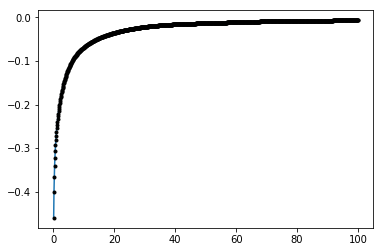

In [16]:
Wee = interp1d(r,W_ee,kind='linear')
plt.plot(r,Wee(r))
plt.plot(r,W_ee,'k.')

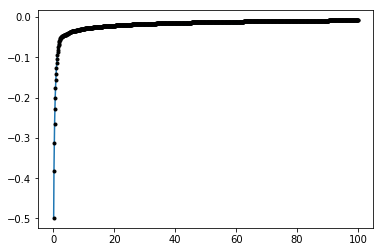

In [17]:
Weh = interp1d(r,W_eh,kind='linear')
plt.plot(r,Weh(r))
plt.plot(r,W_eh,'k.')

In [18]:
def integrand11(rx,ry,a,b):
    return 27.21*rx*ry*wavefunc(rx,ry,a,b)**2*Weh(rx)

In [19]:
def V11(ry,aa,bb):    
    return 2*np.pi*integrate.quad(integrand11, rx[0], rx[-1],
                                    args=(ry,aa,bb), limit=200)[0]

In [20]:
def V22(aa,bb):    
    return 2*np.pi*integrate.quad(V11, ry[0], ry[-1],
                                    args=(aa,bb), limit=200)[0]

In [21]:
def integrand22(rx,ry,a,b):
    if abs(rx-ry)<0.1: return 0
    else:
        return 27.21*rx*wavefunc(rx,ry,a,b)**2*Wee(abs(ry-rx))

In [22]:
def V33(ry,aa,bb):    
    return 2*np.pi*ry*integrate.quad(integrand22, rx[0], rx[-1],
                                    args=(ry,aa,bb), limit=200)[0]

In [23]:
def V44(aa,bb):    
    return 2*np.pi*integrate.quad(V33, ry[0], ry[-1],
                                    args=(aa,bb), limit=200)[0]

In [24]:
from ase.units import Bohr, Hartree

eff_mass=0.277

def K11(a,b):
     return Hartree*(1/(2*a**2)+1/(2*b**2)+8*(a**2+b**2)/(a+b)**4)/eff_mass

In [25]:
x=np.zeros(2)

def gs(x):
    return K11(x[0],x[1])+2*V22(x[0],x[1])+V44(x[0],x[1])

In [26]:
from scipy.optimize import minimize

value_min = minimize(gs, [1, 1])

value_min

/home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised

      fun: 0.00209740642496652
 hess_inv: array([[2214975.70516697, 2219712.13197085],
       [2219712.13197085, 2224460.69077129]])
      jac: array([-6.86736894e-06, -6.83841063e-06])
  message: 'Optimization terminated successfully.'
     nfev: 112
      nit: 27
     njev: 28
   status: 0
  success: True
        x: array([305.73881806, 306.3854919 ])